In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#import and preprocess data
dataset=pd.read_csv('Final.csv')


In [27]:
import missingno as msno

<AxesSubplot:>

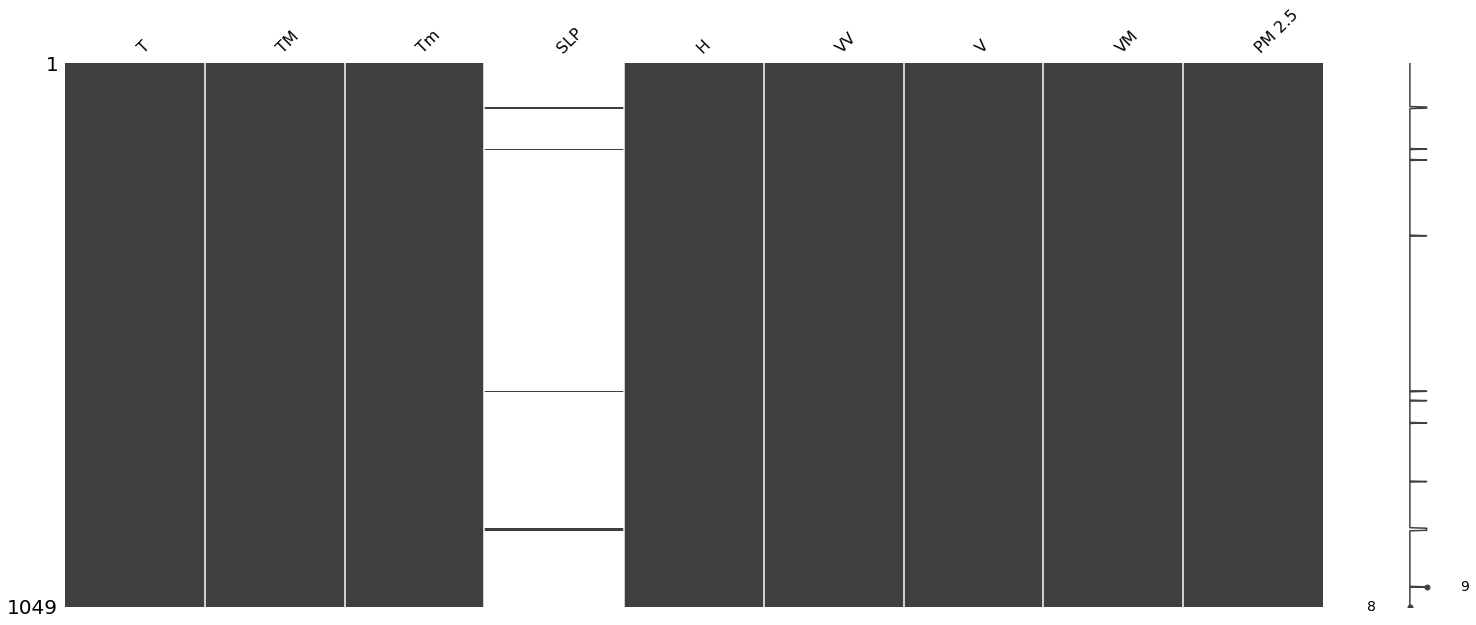

In [28]:
msno.matrix(dataset)

In [29]:
df=dataset.dropna()

<AxesSubplot:>

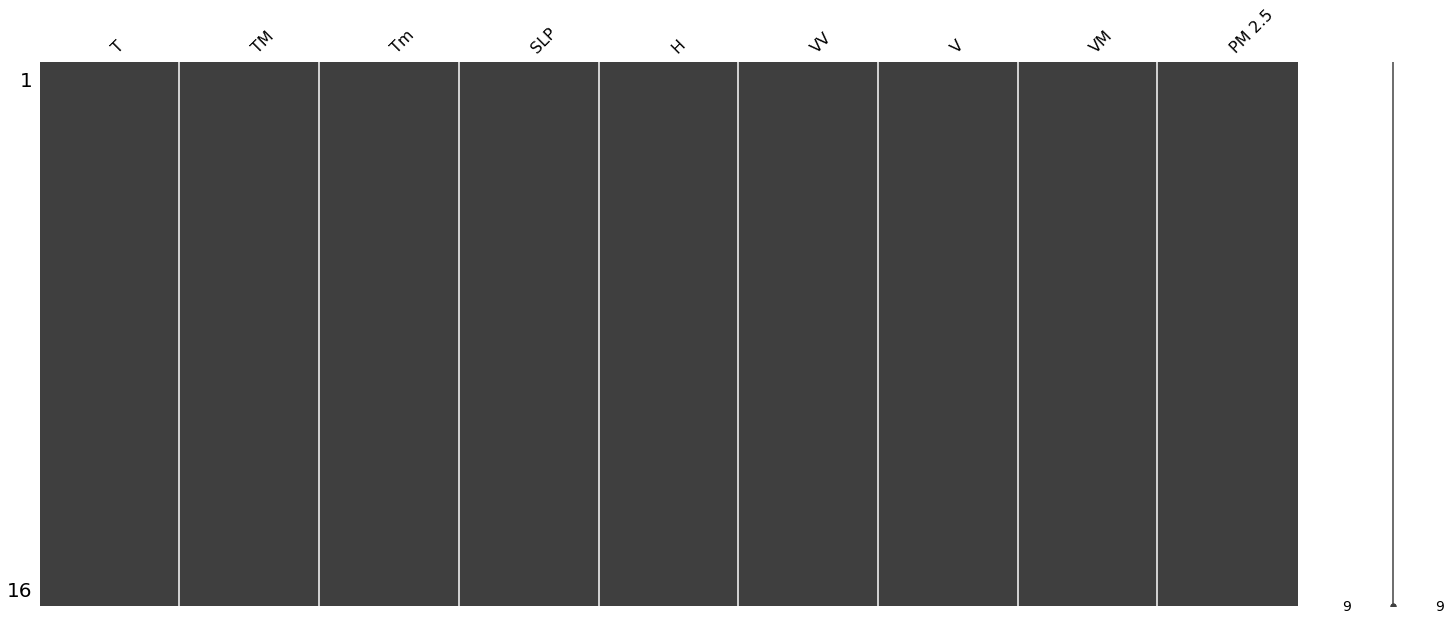

In [30]:
msno.matrix(df)

In [31]:
df["SLP"].mean()

1004.9874999999998

In [32]:
ds=dataset.fillna(1004.9874999999998)

<AxesSubplot:>

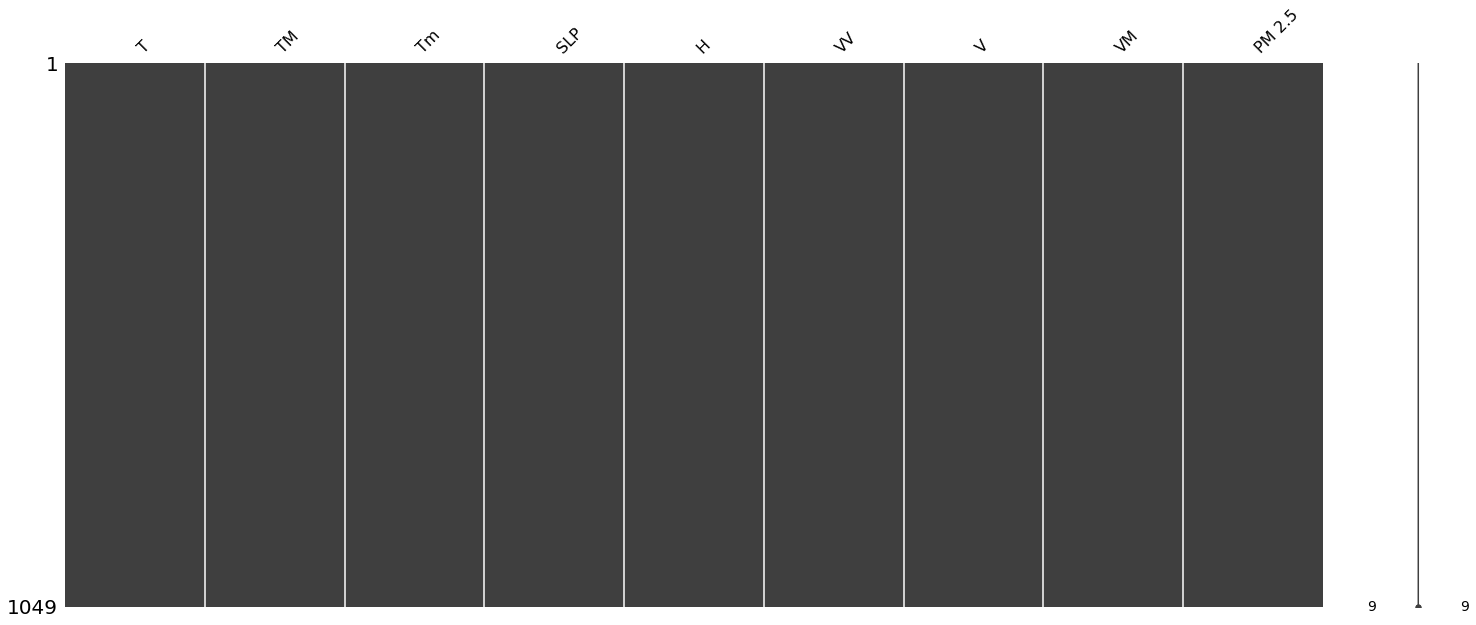

In [33]:
msno.matrix(ds)

In [34]:

X=ds.iloc[:,:-1] 
y=ds.iloc[:,-1] 

In [35]:
# split data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
X_train

,T,TM,Tm,SLP,H,VV,V,VM
662,16.1,23.0,8.8,-,59,1.4,3.3,9.4
673,10.8,15.4,8.0,-,95,0.2,4.3,16.5
72,30.5,38.4,20.0,-,25,2.9,9.6,24.1
964,28.3,35.5,20.8,-,47,3.4,7.0,16.5
693,9.4,14.5,6.0,-,93,1.0,10.7,16.5
...,...,...,...,...,...,...,...,...
131,38.2,42.2,33.3,-,34,1.6,16.7,29.4
532,31.3,36.8,27.2,-,72,2.9,10.7,18.3
18,18.7,28.0,10.8,-,50,2.7,6.5,14.8
687,15.4,22.0,8.4,-,71,1.6,3.3,13


In [21]:
y_train

662    246.08
673    282.94
72     127.75
964     91.38
693    101.98
        ...  
131    164.00
532     40.66
18     155.29
687    276.09
370     81.85
Name: PM 2.5, Length: 383, dtype: float64

In [37]:
# build model
from sklearn.linear_model import LinearRegression
LinR=LinearRegression()
LinR.fit(X_train,y_train)

LinearRegression()

In [38]:
print(LinR.score(X_train, y_train))
print(LinR.score(X_test, y_test))

0.6819215499319956
0.6939168889550285


In [40]:
prediction=LinR.predict(X_test)

In [41]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 34.42704370859507
MSE: 2243.8894087005046
RMSE: 47.36970982284465


In [ ]:
#RIDGE

In [42]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(LinR,X,y,cv=5)

score.mean()

0.5769678984837916

In [43]:
LinR=LinearRegression()
mse=cross_val_score(LinR,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-2768.2974430691675


In [45]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [46]:
ridge=Ridge()
parameters={'alpha':[1e-11,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-11, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [47]:
ridge_regressor.best_score_

-2768.297443069173

In [48]:
prediction=ridge_regressor.predict(X_test)

In [49]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 34.307877465585314
MSE: 2202.34877434467
RMSE: 46.929188937639545


In [ ]:
#Lass0

In [50]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [51]:
lasso=Lasso()
parameters={'alpha':[1e-20,1e-5,1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)

C:\Users\sas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1071389.121683559, tolerance: 704.1743337037426
  model = cd_fast.enet_coordinate_descent(
C:\Users\sas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 922232.8105112284, tolerance: 600.7584917329679
  model = cd_fast.enet_coordinate_descent(
C:\Users\sas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1032987.5826777564, tolerance: 658.8330918379976
  model = cd_fast.enet_coordinate_descent(
C:\Users\sas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Obje

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-20, 1e-05, 1e-15, 1e-10, 1e-08, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [52]:
lasso_regressor.best_score_

-2768.2974432297224

In [53]:
prediction=lasso_regressor.predict(X_test)

In [54]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 34.30787746579477
MSE: 2202.348774324336
RMSE: 46.9291889374229


In [ ]:
#KNN

In [55]:
from sklearn.neighbors import KNeighborsRegressor

In [56]:
kn = KNeighborsRegressor(n_neighbors=1)
kn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [57]:
print(kn.score(X_train, y_train))

1.0


In [58]:
print(kn.score(X_test, y_test))

0.39331751605005005


In [59]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(kn, X, y, cv = 3)

In [60]:
score.mean()

0.21707626193332777

In [61]:
#HYPERPARAMETER TUNING
accuracy = []
for i in range(1, 40):
    kn = KNeighborsRegressor(n_neighbors=i)
    score = cross_val_score(kn, X, y, cv=5, scoring="neg_mean_squared_error")
    accuracy.append(score.mean())

In [62]:
cross_val_score(kn, X, y, cv = 3).mean()

0.5436839236207812

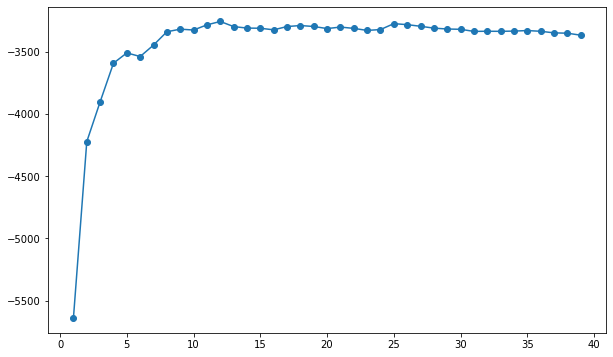

In [63]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 40), accuracy, marker='o')

In [64]:
kn = KNeighborsRegressor(n_neighbors=5)
kn.fit(X_train, y_train)

KNeighborsRegressor()

In [65]:
prediction=kn.predict(X_test)

In [66]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 36.69868571428571
MSE: 3084.7406758730162
RMSE: 55.540441804805766


In [ ]:
# Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()
random.fit(X_train, y_train)

RandomForestRegressor()

In [68]:
print(random.score(X_train, y_train))

0.9723050396121012


In [69]:
print(random.score(X_test, y_test))

0.7639329540961832


In [70]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(random, X, y, cv = 5)

In [71]:
score.mean()

0.6868232495638285

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [74]:
#Randomised Search
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 5, 10]
params = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [75]:
search = RandomizedSearchCV(random, params, scoring='neg_mean_squared_error', 
                            cv=5, n_iter=100, random_state=43, n_jobs=-1)
search.fit(X,y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=43, scoring='neg_mean_squared_error')

In [83]:
search.best_score_

-1889.4890023901776

In [84]:
prediction=search.predict(X_test)

In [85]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 19.92972640115268
MSE: 834.5287476908632
RMSE: 28.88821122345347


In [ ]:
#XG Boost

In [76]:
from xgboost import XGBRegressor

In [77]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [78]:
print(xgb.score(X_train, y_train))

0.9994794750099658


In [79]:
print(xgb.score(X_test, y_test))

0.7289440242581914


In [80]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb, X, y, cv = 3)

In [81]:
score.mean()

0.6616537408842396

In [82]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
learning_rate = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
subsample = [0.7, 0.6, 0.8]
min_child_weight = list(range(3, 8))
objective = ['reg:squarederror']
params = {
    'n_estimators': n_estimators,
    'learning_rate': learning_rate,
    'max_depth': max_depth,
    'subsample': subsample,
    'min_child_weight': min_child_weight,
    'objective': objective
}

In [86]:
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(xgb, params, scoring='neg_mean_squared_error', 
                            cv=5, n_iter=100, random_state=43, n_jobs=-1, verbose=True)
search.fit(X,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          enable_categorical=False, gamma=0,
                                          gpu_id=-1, importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimato...
                                          verbosity=None),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learni

In [87]:
search.best_score_

-1948.8757753185334

In [88]:
prediction=search.predict(X_test)

In [89]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 7.891220042758518
MSE: 137.22012073880524
RMSE: 11.714099228656263
